***Customer Churn Analysis***

Customer churn, also known as customer attrition.

Rate at which customers stop doing business with a company over a specific period
In a dataset related to customer churn, "churn yes" and "churn no" (or similar labels) 

indicate whether a customer has stopped using a service or product (yes) or continues to be a customer (no) within a specific timeframe. 

**Table of Content**

datatype
Null Values
Duplicate Data
Eda
Predictive Modelling 


In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df=pd.read_csv("Customer Churn.csv")

In [198]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [199]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [200]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [201]:

df["TotalCharges"] = df["TotalCharges"].replace(" ","0")

In [202]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [204]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [205]:
df.duplicated().sum()


0

In [206]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


**1. What is the overall customer churn rate?**

In [208]:
df_churn= df.Churn.value_counts(normalize=True).mul(100).reset_index()

In [209]:
df_churn.columns=['Churn','Percentage']

In [210]:
df_churn['Percentage'] = df_churn['Percentage'].round(2).astype(str) + '%'

In [211]:
df_churn

,Churn,Percentage
0,No,73.46%
1,Yes,26.54%


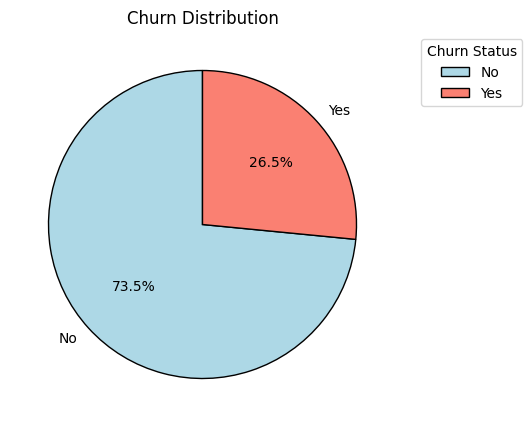

In [359]:
plt.figure(figsize = (5,5))
plt.pie(df_churn['Percentage'].str.rstrip('%').astype(float),   # Convert back to float
        labels=df_churn['Churn'], 
        autopct='%1.1f%%', 
        colors=['lightblue', 'salmon'], 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'})

plt.title('Churn Distribution')
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Overall Churn Rate is one-fourth approx

**2. Do long-term customers churn less? (Churn Rate Over Time/  Tenure & Customer Loyalty)**

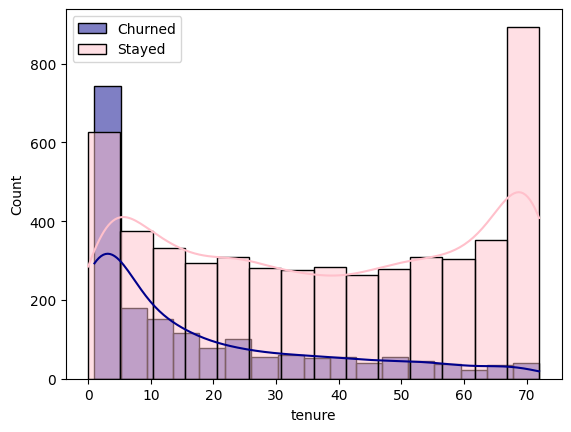

In [538]:
sns.histplot(df[df['Churn'] == 'Yes']['tenure'], kde=True, color='darkblue', label='Churned')
sns.histplot(df[df['Churn'] == 'No']['tenure'], kde=True, color='pink', label='Stayed')
plt.legend()

Majority of churned customers have very low tenure (0-10 months)

The highest churn count is concentrated at low tenure values (0-10 months).

This suggests that new customers are more likely to leave within the first few months.

Churn decreases as tenure increases

As tenure increases, the number of churned customers drops significantly.

This indicates that long-term customers are more likely to stay and have lower churn rates.

Long-tenure churn is rare but present

Some customers still churn after staying for several years, though this is much less frequent.

**3. Seasonal Patterns in Churn**

<Figure size 1200x600 with 0 Axes>

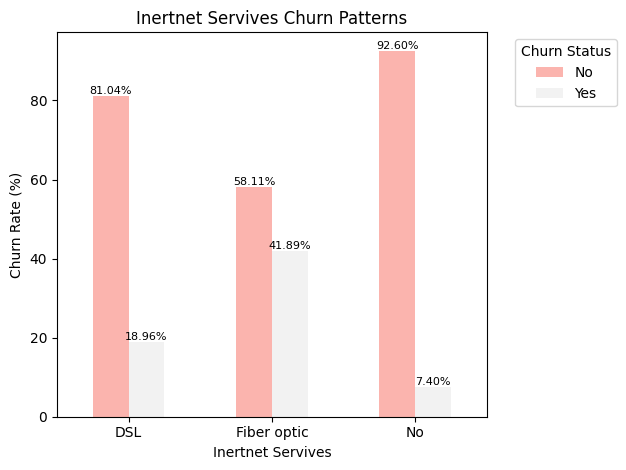

In [615]:

# Calculate churn rate by month
Internet_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()*100

# Plot seasonal churn
plt.figure(figsize=(12, 6))
ax=Internet_churn.plot( kind='bar',colormap='Pastel1')

plt.title('Inertnet Servives Churn Patterns')
plt.xlabel('Inertnet Servives')
plt.ylabel('Churn Rate (%)')
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.xticks(rotation=0)
plt.tight_layout()


for container in ax.containers:
    ax.bar_label(container,fontsize=8, color='black',fmt='%.2f%%')
    
plt.show()

**4. How different contract types affect churn? (Contract Types & Churn)**

In [215]:
Contract_churn=df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100

 (normalize=True) it means that the output will be normalized to show proportions (or percentages) instead of absolute counts

 unstack() helps reshape the output. or Transform 
 here on churn column unstach Is used therefore it get transformned in to column showing below


In [216]:
Contract_churn

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


<Figure size 300x300 with 0 Axes>

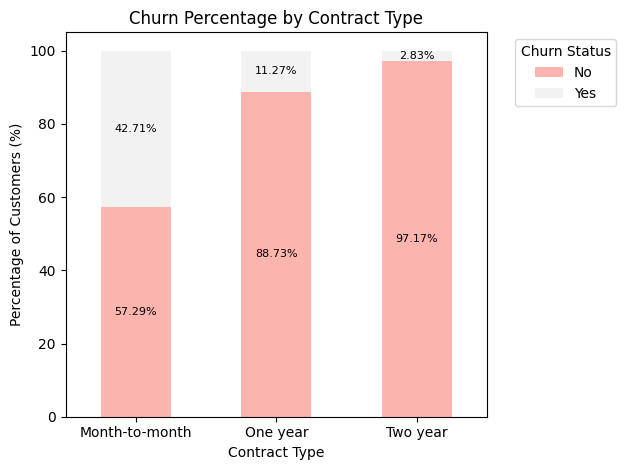

In [375]:
plt.figure(figsize = (3,3))

ax=Contract_churn.plot(kind='bar', stacked=True, colormap='Pastel1')

#ax= sns.barplot(Contract_churn)

# Labels and title
plt.xlabel("Contract Type")
plt.ylabel("Percentage of Customers (%)")
plt.title("Churn Percentage by Contract Type")
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')    
plt.xticks(rotation=0)
plt.tight_layout()

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='center', fontsize=8, color='black')
    
# Show plot
plt.show()

People having two year of contract have less likely to be churned as compared to month-to-month

**5. How much gender is affecting the churn data? (Gender & Churn )**

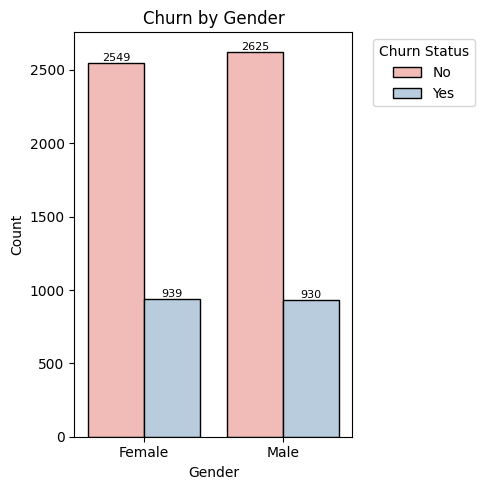

In [623]:
plt.figure(figsize = (5,5))
ax=sns.countplot(x = "gender", data = df, hue = "Churn",palette='Pastel1',edgecolor='black')

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn by Gender")
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')   # for hue I can add legends
plt.xticks(rotation=0)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container,fontsize=8, color='black')

plt.show()

**6. Which payment methods are associated with higher churn? (Payment Methods & Churn)**

In [675]:
df_payment_method=df.groupby('PaymentMethod')['Churn'].value_counts().unstack().reset_index()

In [444]:
df_payment_method.sort_values(by='Yes' ,ascending=False)

Churn,PaymentMethod,No,Yes
2,Electronic check,1294,1071
3,Mailed check,1304,308
0,Bank transfer (automatic),1286,258
1,Credit card (automatic),1290,232


Customer with payment method Ecectronic Check has higher churn rate and credit card has lower as compared

**7. Are higher bills linked to churn?**

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

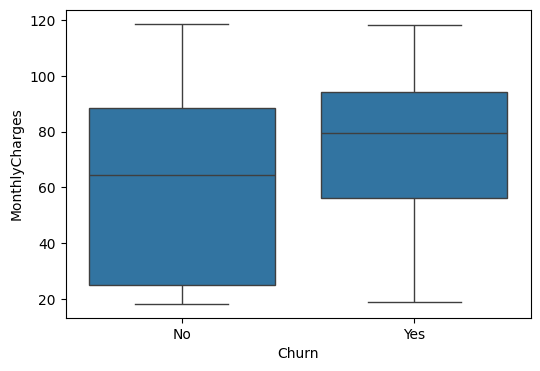

In [468]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

those who have stopped using a service or product more likely to pay more Monthly 

<Axes: xlabel='Churn', ylabel='TotalCharges'>

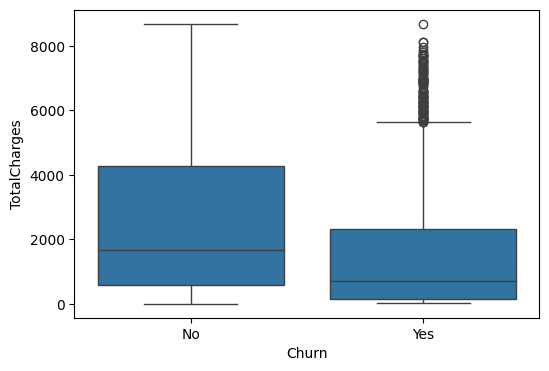

In [470]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='TotalCharges', data=df)

**8. Pricing & Customer Retention**

In [677]:
# Analyze churn rate by monthly charges
df['MonthlyChargesGroup'] = pd.cut(df['MonthlyCharges'], bins=5)
monthly_charges_churn = df.groupby('MonthlyChargesGroup')['Churn'].value_counts(normalize=True).unstack()*100
monthly_charges_churn

Churn,No,Yes
MonthlyChargesGroup,,
"(18.15, 38.35]",88.592098,11.407902
"(38.35, 58.45]",73.034826,26.965174
"(58.45, 78.55]",70.519386,29.480614
"(78.55, 98.65]",63.033954,36.966046
"(98.65, 118.75]",69.942748,30.057252


<Figure size 1000x500 with 0 Axes>

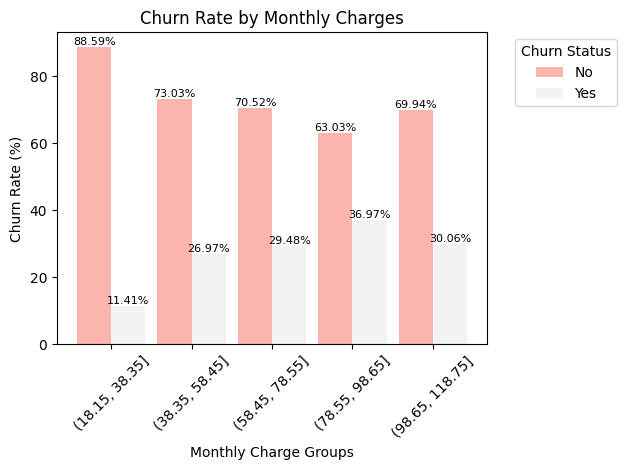

In [689]:

# Plot churn rate by monthly charges
plt.figure(figsize = (10,5))

ax=monthly_charges_churn.plot( kind='bar',colormap='Pastel1', width = 0.85)
plt.title('Churn Rate by Monthly Charges')
plt.ylabel('Churn Rate (%)')
plt.xlabel("Monthly Charge Groups")
plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')   # for hue I can add legends
plt.xticks(rotation=45)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container,fontsize=8, color='black',fmt='%.2f%%')


plt.show()

people who pay less has high retention rate

**9. Senior Citizens & Churn**

In [698]:
# Calculate churn rate by senior citizen status
senior_churn = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100
print("Churn Rate by Senior Citizen Status:")
print(senior_churn)

Churn Rate by Senior Citizen Status:
Churn                 No        Yes
SeniorCitizen                      
0              76.393832  23.606168
1              58.318739  41.681261


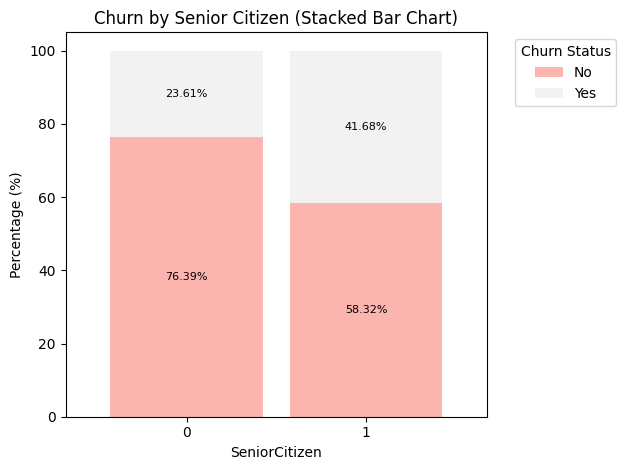

In [720]:

ax=senior_churn.plot(kind='bar', stacked=True,colormap='Pastel1', width = 0.85)  # Customize colors if desired



plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

plt.legend(title='Churn Status', bbox_to_anchor=(1.05, 1), loc='upper left')   # for hue I can add legends
plt.xticks(rotation=0)
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container,fontsize=8, color='black',fmt='%.2f%%',label_type='center')

plt.show()

Senior citizen is more likely to leave the services than non- senior citizen

**10. Predictive Modeling & Future Actions**

In [730]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data for modeling
X = df.drop(['Churn', 'customerID'], axis=1)
X = pd.get_dummies(X)  # Convert categorical variables to dummy variables
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 3 Risk Factors Leading to Churn:")
print(feature_importance.head(3))

Confusion Matrix:
[[1400  139]
 [ 309  265]]

Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1539
         Yes       0.66      0.46      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113


Top 3 Risk Factors Leading to Churn:
TotalCharges      0.158147
tenure            0.140708
MonthlyCharges    0.134492
dtype: float64


**11.  Proactive Churn Prevention**

In [742]:
# Use AI/automation to predict churn and take proactive actions
# For example, you can use the model to predict churn for all customers and target those with high churn probability

# Predict churn probability for all customers
df['ChurnProbability'] = model.predict_proba(X)[:, 1]

# Identify high-risk customers
high_risk_customers = df[df['ChurnProbability'] > 0.5]

# Implement targeted retention strategies for high-risk customers
print("High-Risk Customers:")
print(high_risk_customers[['customerID', 'ChurnProbability']])

High-Risk Customers:
      customerID  ChurnProbability
2     3668-QPYBK              0.82
4     9237-HQITU              0.81
5     9305-CDSKC              0.99
8     7892-POOKP              0.67
13    0280-XJGEX              0.81
...          ...               ...
7018  1122-JWTJW              0.67
7021  1699-HPSBG              0.66
7026  8775-CEBBJ              0.61
7032  6894-LFHLY              0.98
7041  8361-LTMKD              0.94

[1703 rows x 2 columns]


***CONCLUSION***

This analysis provides insights into customer churn and helps identify key factors contributing to churn. By leveraging predictive modeling, you can proactively address churn and implement targeted retention strategies.